# Лабораторная №2
#### Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

#### Задание:

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
    - устранение пропусков в данных;
    - кодирование категориальных признаков;
    - нормализация числовых признаков. 

# Melbourne Housing Snapshot

- Rooms: Number of rooms
- Price: Price in dollars
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - - development site; o res - other residential.
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size
- BuildingArea: Building Size
- CouncilArea: Governing council for the area

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('melb_data.csv')

In [25]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Обработка пропусков в данных

Желтый - пропущенные данные, синий - не пропущенные

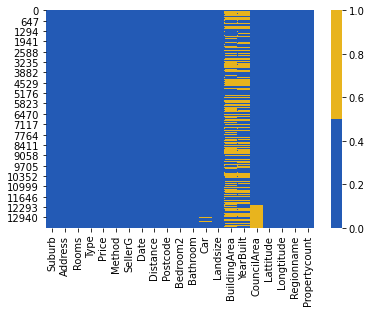

In [10]:
cols = data.columns
colours = ['#235AB5', '#E8B41E'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Рассмотрим числовые колонки с пропущенными значениями

In [4]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Car. Тип данных float64. Количество пустых значений 62, 0.46%.
Колонка BuildingArea. Тип данных float64. Количество пустых значений 6450, 47.5%.
Колонка YearBuilt. Тип данных float64. Количество пустых значений 5375, 39.58%.


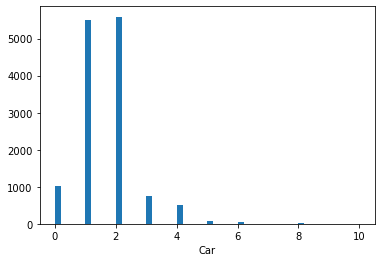

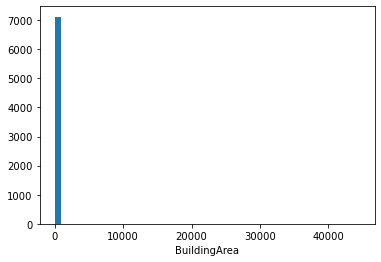

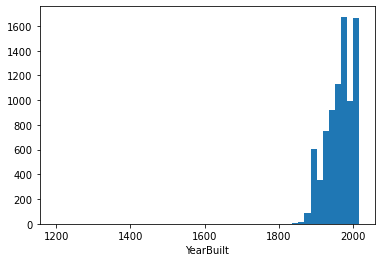

In [5]:
data_num = data[num_cols]
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Выбросов нет, распределения одномодальные

In [6]:
data = data.fillna(data.mode())

Рассмотрим пропуски в категориальных данных

In [7]:
cat_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка CouncilArea. Тип данных object. Количество пустых значений 1369, 10.08%.


In [8]:
data[:] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(data)

In [17]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Все пропуски в данных заполнены

## Кодирование категориальных признаков

Рассмотрим количество категорий в признаках типа object

In [25]:
total_count = data.shape[0]
num_cols = []
for col in data.columns: 
    dt = str(data[col].dtype)
    if (dt=='object'):
        num_cols.append(col)        
        print('Колонка {}. Количество категорий: {}'.format(col, data[col].unique().shape[0]))

Колонка Suburb. Количество категорий: 314
Колонка Address. Количество категорий: 13378
Колонка Type. Количество категорий: 3
Колонка Method. Количество категорий: 5
Колонка SellerG. Количество категорий: 268
Колонка Date. Количество категорий: 58
Колонка CouncilArea. Количество категорий: 33
Колонка Regionname. Количество категорий: 8


В признаках Suburb, Address, SellerG, CouncilArea слишком много категорий для OneHotEncoder, так что используем LabelEncoder.

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical1 = ['Suburb', 'Address', 'SellerG', 'CouncilArea']
for col in categorical1:
    data[col] = le.fit_transform(data[col])

Для остальных признаков используем OneHotEncoder

In [19]:
categorical2 = ['Type', 'Method', 'Regionname']

data = pd.concat([data, pd.get_dummies(data[categorical2], columns=categorical2, drop_first=True)],axis=1)
data.drop(categorical2, axis=1, inplace=True)

Дату обработаем отдельно

In [20]:
import datetime as dt

data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(dt.datetime.toordinal)

In [35]:
data.shape

(13580, 31)

## Нормализация числовых признаков

In [52]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    dt = str(data[col].dtype)
    if dt=='float64' or dt=='int64':
        num_cols.append(col)

In [53]:
data[num_cols] = data[data[num_cols] > 0][num_cols]

In [50]:
def diagnostic_plots_data(df):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df.hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df, dist="norm", plot=plt)
    plt.show()

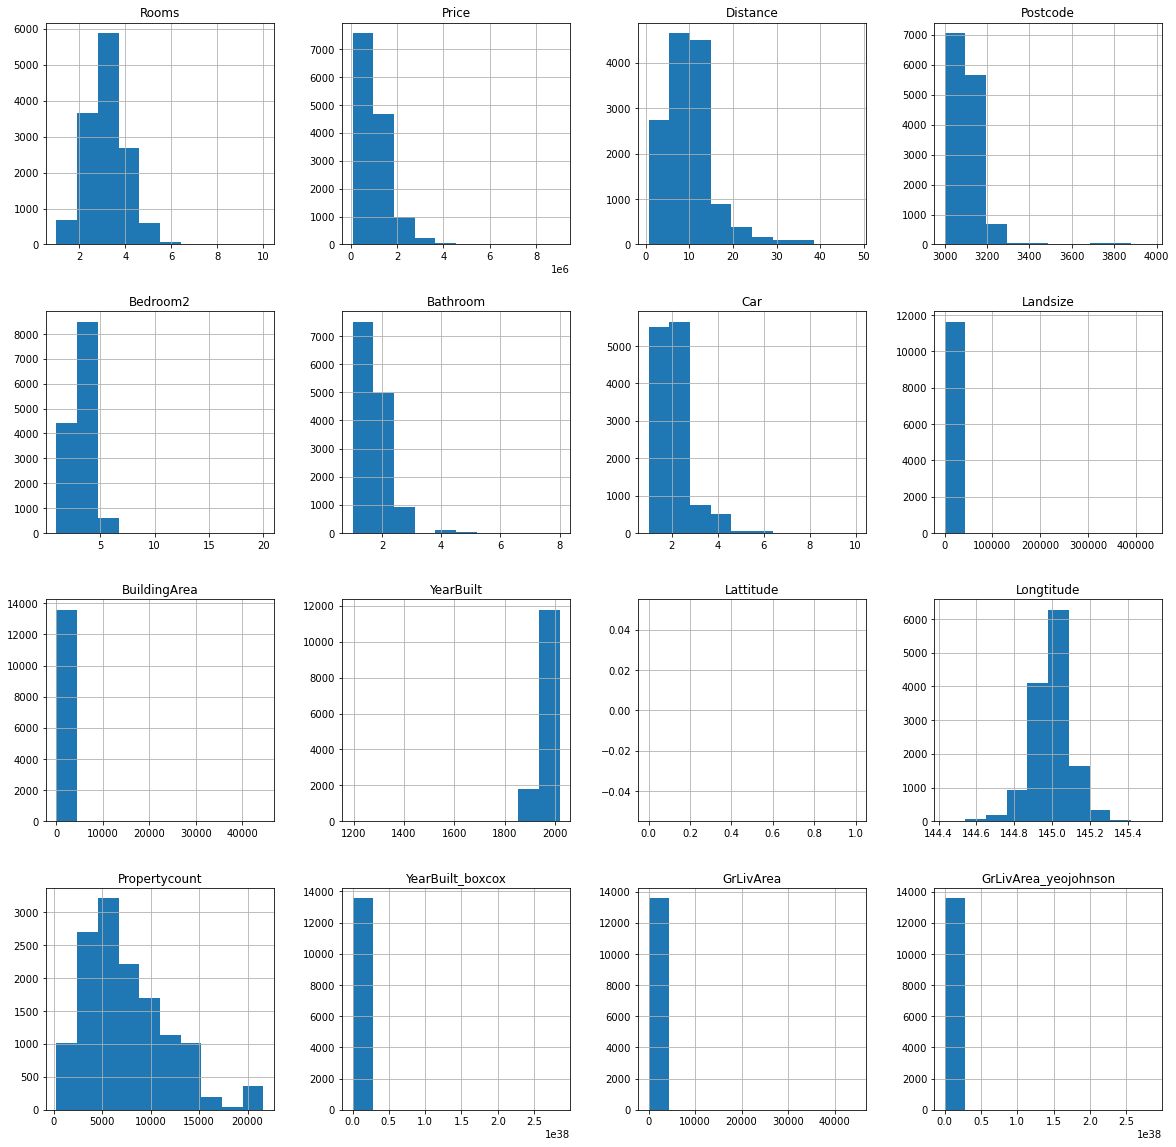

In [54]:
data[num_cols].hist(figsize=(20,20))
plt.show()

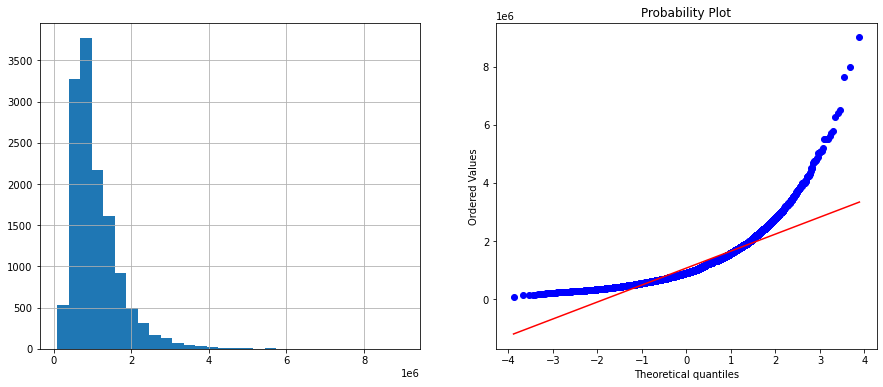

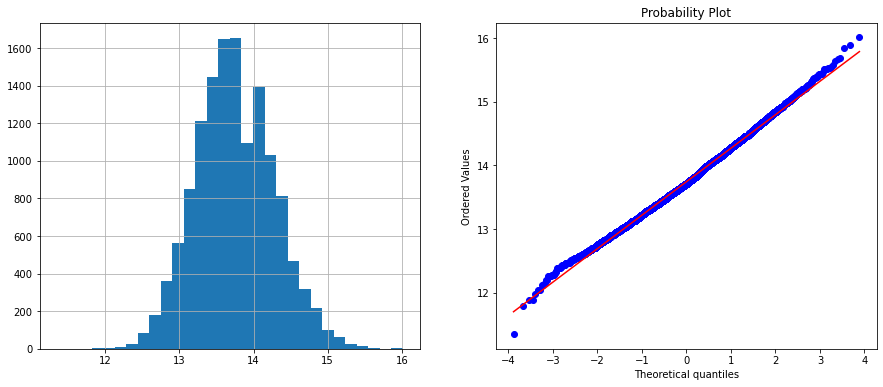

In [59]:
diagnostic_plots_data(data['Price'])
diagnostic_plots_data( np.log(data['Price']) )

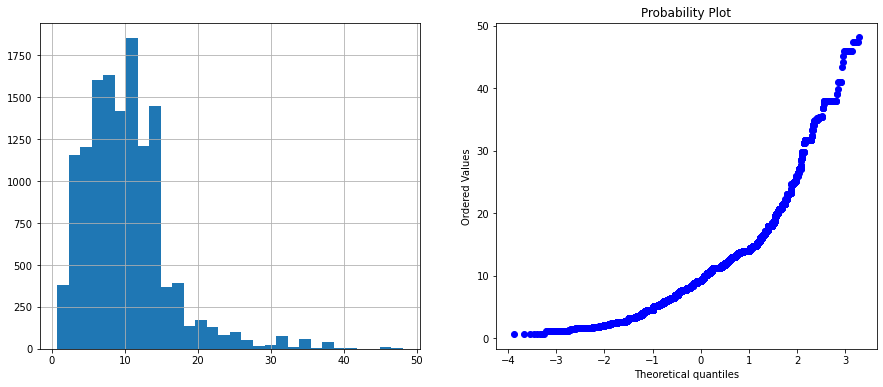

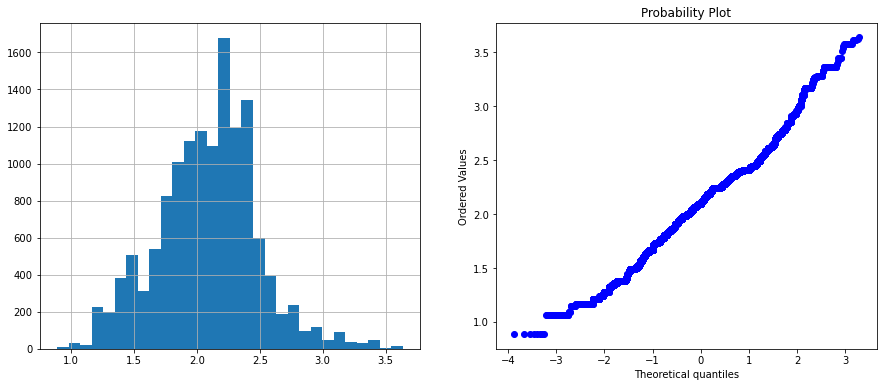

In [65]:
diagnostic_plots_data(data['Distance'])
diagnostic_plots_data( data['Distance']**(1/3) )

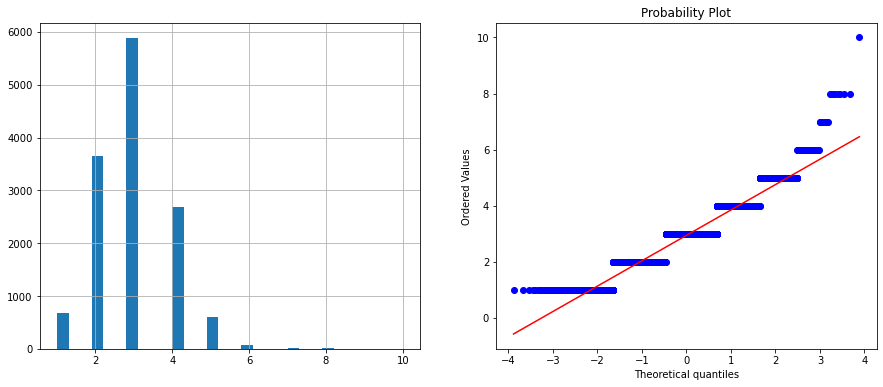

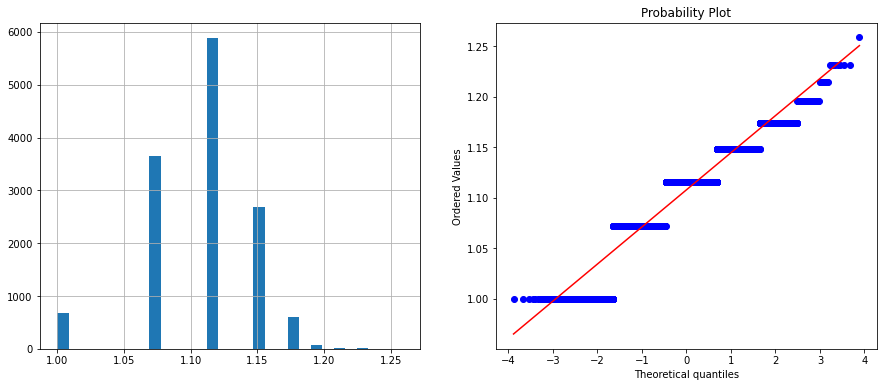

In [57]:
diagnostic_plots_data(data['Rooms'])
diagnostic_plots_data( data['Rooms']**(1/10)  )

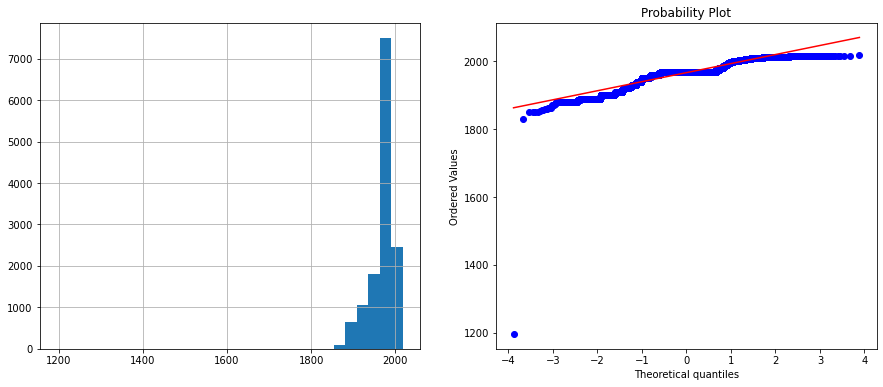

Оптимальное значение λ = 18.95465909623817


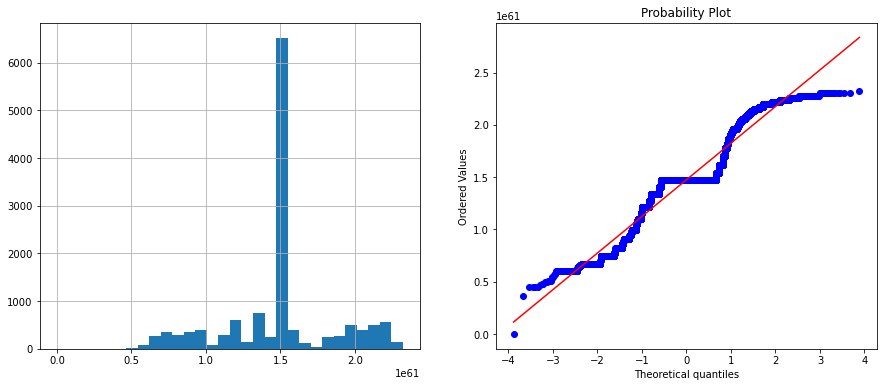

In [23]:
diagnostic_plots_data(data['YearBuilt'])

data['YearBuilt_boxcox'], param = stats.boxcox(data['YearBuilt']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots_data(data['YearBuilt_boxcox'])